In [ ]:
from importlib import reload
import utils_model;reload(utils_model)
from utils_model import Cpm_x

In [45]:
cpm = Cpm_x(stages=6, part_nb=19)

In [46]:
cpm.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_18 (InputLayer)            (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
lambda_18 (Lambda)               (None, None, None, 3) 0           input_18[0][0]                   
____________________________________________________________________________________________________
Conv1_1 (Conv2D)                 (None, None, None, 64 1792        lambda_18[0][0]                  
____________________________________________________________________________________________________
Conv1_2 (Conv2D)                 (None, None, None, 64 36928       Conv1_1[0][0]                    
___________________________________________________________________________________________

In [1]:
import json

In [2]:
with open('person_keypoints_train2017.json','r') as file_object:
    contents = json.load(file_object)

In [5]:
type(contents)

dict

In [5]:
print(contents.keys())

dict_keys(['images', 'licenses', 'info', 'annotations', 'categories'])


In [6]:
print(len(contents))

5


In [3]:
contents_annatations = contents['annotations']

In [4]:
print(len(contents_annatations))

262465


In [5]:
p_list = []
for i in range(262465):
    p_list.append(contents_annatations[i]['image_id'])

In [50]:
h_list=[]
for idx, c in enumerate(contents_annatations):
    if c['image_id'] == 262145:
        h_list.append(c['id'])
        
print(len(h_list))
print(h_list)

14
[1218400, 1220136, 1246711, 1249960, 1262984, 1266299, 1293147, 1302954, 1311644, 1314438, 1321931, 1731447, 2025332, 900100262145]


In [6]:
len(p_list)

262465

In [7]:
p_set = set(p_list)
p_set

In [8]:
len(p_set)

64115

In [9]:
cont0 = contents_annatations[0]

In [10]:
print(cont0)

{'area': 28292.08625, 'iscrowd': 0, 'id': 183020, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 325, 160, 2, 398, 177, 2, 0, 0, 0, 437, 238, 2, 0, 0, 0, 477, 270, 2, 287, 255, 1, 339, 267, 2, 0, 0, 0, 423, 314, 2, 0, 0, 0, 355, 367, 2], 'segmentation': [[267.03, 243.78, 314.59, 154.05, 357.84, 136.76, 374.05, 104.32, 410.81, 110.81, 429.19, 131.35, 420.54, 165.95, 451.89, 209.19, 464.86, 240.54, 480, 253.51, 484.32, 263.24, 496.22, 271.89, 484.32, 278.38, 438.92, 257.84, 401.08, 216.76, 370.81, 247.03, 414.05, 277.3, 433.51, 304.32, 443.24, 323.78, 400, 362.7, 376.22, 375.68, 400, 418.92, 394.59, 424.32, 337.3, 382.16, 337.3, 371.35, 388.11, 327.03, 341.62, 301.08, 311.35, 276.22, 304.86, 263.24, 294.05, 249.19]], 'image_id': 537548, 'num_keypoints': 8, 'category_id': 1, 'bbox': [267.03, 104.32, 229.19, 320]}


In [32]:
key_cont0 = cont0['keypoints']
len(key_cont0)

51

In [11]:
import cv2

In [12]:
image_id = cont0['image_id']

In [14]:
str(image_id) 

'537548'

In [19]:
img_file = str('0')*(12-len(str(image_id))) + str(image_id) + '.jpg'

In [25]:
path = '/home/x6850/works/repos/keras_Realtime_Multi-Person_Pose_Estimation/dataset/train2017/'

In [ ]:
path0 = '/home/x6850/works/repos/keras_Realtime_Multi-Person_Pose_Estimation/dataset/train2017/000000537548.jpg'

In [26]:
img_path = path + img_file

In [27]:
print(img_path)

/home/x6850/works/repos/keras_Realtime_Multi-Person_Pose_Estimation/dataset/train2017/000000537548.jpg


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
print(key_cont0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 325, 160, 2, 398, 177, 2, 0, 0, 0, 437, 238, 2, 0, 0, 0, 477, 270, 2, 287, 255, 1, 339, 267, 2, 0, 0, 0, 423, 314, 2, 0, 0, 0, 355, 367, 2]


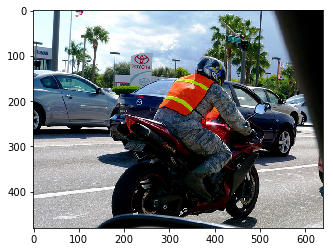

In [30]:
oriImg = cv2.imread(img_path) # B,G,R order
plt.imshow(oriImg[:,:,[2,1,0]])

In [9]:
with open('person_keypoints_val2017.json','r') as file_object:
    vaild_kp = json.load(file_object)
    
valid_ann = vaild_kp['annotations']
print(len(valid_ann))

11004


In [10]:
val_kp_list = []
for i in range(11004):
    val_kp_list.append(valid_ann[i]['image_id'])

In [12]:
len(set(val_kp_list))

2693

In [13]:
print(__file__)

NameError: name '__file__' is not defined

In [15]:
from pycocotools.coco import COCO
from scipy.spatial.distance import cdist
import numpy as np
import cv2
import os
import os.path
import struct
import h5py

In [26]:
tr_anno_path = '/home/x6850/works/repos/' \
               'keras_Realtime_Multi-Person_Pose_Estimation/dataset/' \
               'annotations/person_keypoints_train2017.json'

In [27]:
print(tr_anno_path)

/home/x6850/works/repos/keras_Realtime_Multi-Person_Pose_Estimation/dataset/annotations/person_keypoints_train2017.json


In [28]:
coco = COCO(tr_anno_path)

loading annotations into memory...


Done (t=6.13s)
creating index...


index created!


In [32]:
ids = list(coco.imgs.keys())

In [34]:
len(ids)

118287

In [41]:
print(ids[0])
img_id = ids[0]

262145


In [47]:
image = coco.imgs[ids[0]]
h, w = image['height'], image['width']

print("Image ID ", ids[0])

Image ID  262145


In [42]:
ann_ids = coco.getAnnIds(imgIds=img_id)
img_anns = coco.loadAnns(ann_ids)

In [43]:
numPeople = len(img_anns)

In [46]:
print(ann_ids)
print(numPeople)

[1218400, 1220136, 1246711, 1249960, 1262984, 1266299, 1293147, 1302954, 1311644, 1314438, 1321931, 1731447, 2025332, 900100262145]
14


In [52]:
print(img_anns)

[{'num_keypoints': 15, 'keypoints': [407, 115, 1, 407, 105, 2, 0, 0, 0, 425, 95, 2, 0, 0, 0, 435, 124, 2, 457, 105, 2, 428, 187, 2, 447, 182, 2, 404, 210, 2, 419, 213, 2, 488, 222, 2, 515, 213, 2, 471, 293, 2, 487, 297, 2, 462, 372, 1, 486, 374, 2], 'iscrowd': 0, 'area': 21258, 'bbox': [387, 71.1, 145, 322], 'id': 1218400, 'image_id': 262145, 'segmentation': [[453, 292.1, 457, 253.1, 439, 245.1, 438, 215.1, 439, 198.1, 420, 223.1, 414, 233.1, 401, 227.1, 400, 226.1, 398, 229.1, 391, 231.1, 387, 213.1, 399, 203.1, 404, 200.1, 413, 194.1, 418, 186.1, 408, 181.1, 415, 154.1, 418, 142.1, 419, 127.1, 422, 125.1, 419, 120.1, 412, 122.1, 407, 112.1, 402, 105.1, 389, 113.1, 390, 105.1, 395, 100.1, 395, 97.1, 398, 83.1, 407, 72.1, 417, 71.1, 424, 72.1, 428, 73.1, 436, 80.1, 441, 90.1, 446, 96.1, 456, 101.1, 472, 110.1, 480, 113.1, 493, 123.1, 499, 136.1, 504, 147.1, 509, 167.1, 515, 182.1, 531, 205.1, 532, 218.1, 525, 229.1, 514, 246.1, 499, 283.1, 499, 307.1, 499, 323.1, 499, 343.1, 505, 367.1

In [57]:
x = [387, 71.1, 145, 322]
y = x[3]/368
print(y)

0.875


In [64]:
random_order = [ i for i,el in enumerate(range(20))]
print(random_order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [65]:
meta_data = np.zeros(shape=(20, 20, 1), dtype=np.uint8)

In [66]:
meta_data.shape

(20, 20, 1)

In [1]:
import json
import os

In [2]:
os.getcwd()

'/home/x6850/works/repos/rt_hp'

In [3]:
jfile = './dataset/annotations/person_keypoints_train2017.json'

In [5]:
with open(jfile, 'r') as json_obj:
    kp_ann = json.load(json_obj)

In [8]:
kp_ann[0]

{'human_annotations': {'human1': [279, 55, 492, 599],
  'human2': [541, 131, 870, 599],
  'human3': [88, 7, 340, 599]},
 'image_id': '054d9ce9201beffc76e5ff2169d2af2f027002ca',
 'keypoint_annotations': {'human1': [313,
   201,
   1,
   312,
   313,
   2,
   320,
   424,
   1,
   406,
   197,
   2,
   431,
   286,
   2,
   459,
   269,
   1,
   375,
   447,
   2,
   0,
   0,
   3,
   0,
   0,
   3,
   416,
   441,
   1,
   0,
   0,
   3,
   0,
   0,
   3,
   395,
   74,
   1,
   372,
   170,
   1],
  'human2': [637,
   374,
   2,
   626,
   509,
   1,
   0,
   0,
   3,
   755,
   347,
   1,
   728,
   538,
   1,
   0,
   0,
   3,
   0,
   0,
   3,
   0,
   0,
   3,
   0,
   0,
   3,
   0,
   0,
   3,
   0,
   0,
   3,
   0,
   0,
   3,
   604,
   169,
   1,
   674,
   290,
   1],
  'human3': [144,
   180,
   1,
   171,
   325,
   2,
   256,
   428,
   2,
   265,
   196,
   1,
   297,
   311,
   1,
   300,
   412,
   1,
   178,
   476,
   2,
   0,
   0,
   3,
   0,
   0,
   3,
   253,
  

In [9]:
kp_ann_new = []
for i in kp_ann:
    if i['image_id'] == '772351fec0433bb5b006144095615f3f536bbba3':
        print('found!')
        kp_ann_new.append(i)

found!


In [10]:
kp_ann_new

[{'human_annotations': {'human1': [399, 178, 505, 467]},
  'image_id': '772351fec0433bb5b006144095615f3f536bbba3',
  'keypoint_annotations': {'human1': [411,
    241,
    1,
    412,
    273,
    1,
    417,
    291,
    1,
    462,
    236,
    2,
    478,
    271,
    1,
    455,
    302,
    1,
    441,
    328,
    1,
    449,
    384,
    1,
    445,
    434,
    1,
    472,
    325,
    1,
    479,
    382,
    1,
    485,
    436,
    1,
    431,
    193,
    1,
    434,
    230,
    1]},
  'url': 'http://www.zhuhaihuwai.com/data/attachment/forum/201212/27/000459nb0ydat6c5q5tcay.jpg'}]

In [12]:
new_file = './dataset/annotations/person_keypoints_valid2017.json'
with open(new_file, 'w') as new_obj:
    json.dump(kp_ann_new, new_obj)